In [15]:
import numpy as np
import skimage
import utils
import pathlib
import matplotlib.pyplot as plt
import math

In [219]:
def otsu_thresholding(im: np.ndarray) -> int:
    """
        Otsu's thresholding algorithm that segments an image into 1 or 0 (True or False)
        The function takes in a grayscale image and outputs a threshold value

        args:
            im: np.ndarray of shape (H, W) in the range [0, 255] (dtype=np.uint8)
        return:
            (int) the computed thresholding value
    """
    assert im.dtype == np.uint8
    ### START YOUR CODE HERE ### (You can change anything inside this block) 
    # You can also define other helper functions
    def norm_hist(im):
        low = 0
        high = 255
        bins = np.linspace(low, high, high - low + 1)
        hist, bin_edges = np.histogram(im,bins=bins, density=True)
        hist_norm = hist*np.diff(bin_edges)
        plt.plot(hist_norm)
        plt.show()
        return hist_norm
    def cum_sum(hist,threshold):
        p1 = hist[0:threshold].sum()
        p2 = hist[threshold:len(hist)].sum()
        return p1,p2
    def cum_mean(hist,threshold):
        m1 = np.sum(hist[0:threshold]*np.arange(0,threshold,1))
        m2 = np.sum(hist[threshold:len(hist)]*np.arange(threshold,len(hist),1))
        return m1, m2
    def global_mean(hist):
        return (hist*np.arange(0,len(hist),1)).sum()
    def between_class_var(mg, m1, p1):
        variance = ((mg*p1)-m1)**2/(p1*(1-p1))
        return variance

    # Compute normalized histogram
    #threshold = 128
    hist = norm_hist(im)
    mg = global_mean(hist)
    var_dict = {}
    var_list_sorted = []
    max_list = []
    print(var_dict)
    for x in range(1, len(hist)):
        p1, p2 = cum_sum(hist, x)
        if 0<p1<1:
            m1, m2 = cum_mean(hist, x)
            mg = global_mean(hist)
            var = between_class_var(mg, m1, p1)
            var_dict[x] = var
    var_list_sorted = sorted(var_dict.items(), key=lambda x: x[1], reverse=True)
    max_list = [k for k,v in var_list_sorted if v == var_list_sorted[0][1]]
    optimal_threshold = sum(max_list)/len(max_list)

    return optimal_threshold
    ### END YOUR CODE HERE ###

Reading image: images/thumbprint.png


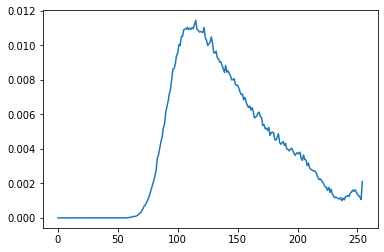

{}
Found optimal threshold: 154.0
Saving image to: image_processed/thumbprint-segmented.png
Reading image: images/polymercell.png


/tmp/ipykernel_9458/2689478857.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert segmented_image.dtype == np.bool, "Expected thresholded image dtype to be np.bool. Was: {}".format(


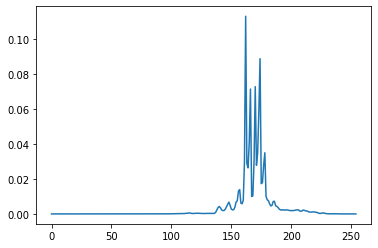

{}
Found optimal threshold: 182.0
Saving image to: image_processed/polymercell-segmented.png


In [222]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impaths_to_segment = [
        pathlib.Path("thumbprint.png"),
        pathlib.Path("polymercell.png")
    ]
    for impath in impaths_to_segment:
        im = utils.read_image(impath)
        threshold = otsu_thresholding(im)
        print("Found optimal threshold:", threshold)

        # Segment the image by threshold
        segmented_image = (im >= threshold)
        assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(
                im.shape, segmented_image.shape)
        assert segmented_image.dtype == np.bool, "Expected thresholded image dtype to be np.bool. Was: {}".format(
                segmented_image.dtype)

        segmented_image = utils.to_uint8(segmented_image)

        save_path = "{}-segmented.png".format(impath.stem)
        utils.save_im(save_path, segmented_image)